### Chapter 4a (Assignment 6)
### John Ming Ngo 30020834

**Problem (30 points):** Choose some sufficiently large value for the number of electrons $N$. For a range of $\tilde{T}$ and $\tilde{B}$ (sufficiently large to capture the extremal behaviour), write a Python routine to sample (probabilistically) the spin orientations of the electrons, and obtain (and plot) the total energy, the magnetization, and the entropy as a function of $\tilde{T}$ at fixed $\tilde{B}$, for a variety of suitable values of $\tilde{B}$. Interpret your results. 

In [0]:
#Question 1

import numpy as np
import numpy.random as rand
import matplotlib.pyplot as plt

"""
Given B and T, gives the probability of heads or tails in that order.
"""
def spinProbs(B, T):
  tanhVal = np.tanh(B/T)
  #print(tanhVal)
  """
  I had it as np.tanh((B, T)) for so long as it was screwing everything up....
  """
  return (1/2)*(1+tanhVal), (1/2)*(1-tanhVal)

"""
Given B, T and N, gets the [number up, number down] of N spins with
B and T as our parameters
"""
def getNumSpins(B, T, N):
  res = [0,0]
  probUp, probDown = spinProbs(B, T)
  #print("--")
  #print(B, T)
  #print(probUp, probDown)
  #print("--")
  for i in range(int(N)):
    randRes = rand.random()
    if randRes < probUp:
      res[0] += 1
    else:
      res[1] += 1
  return res

"""
Calculates unitless internal energy U given ups and downs.
"""
def getInternalE(ups, downs):
  return ups - downs

"""
Calculates unitless magnetic moment given downs and ups.
"""
def getM(ups, downs):
  return downs - ups

"""
Calculates unitless Boltzmann Entropy given ups and downs.
"""
def getNumEnt(ups, downs):
  total = ups + downs
  return (-total)*((ups/total)*(np.log((ups/total)))+(downs/total)*(np.log((downs/total))))

#### Below, we do the random sampling and the calculation of the values we want.

In [0]:
#Running with 10k particles
N = 1e5
#After experimentation, I determined that a finer range of numbers was preferable for the Bs and the Ts
Bs = [x/5 for x in range(-5, 6, 1)]
Ts = [x/5 for x in range(1, 50, 1)] #Temperature should not be negative, or so I'd think. [x/5 for x in range(-50, 0, 1)] +  Still, plotted the negative half for reference.

"""
Attain array of arrays of [num ups, num downs] for N electron spins. Inner array corrisponds to a given B; entries inside corrispond to a given T.
"""
spinResByB = []
for mag in Bs:
  bRes = []
  for temp in Ts:
    bRes.append(getNumSpins(mag, temp, N))
  spinResByB.append(bRes)
   
"""
Get the internal energies for each result of N spins.
"""
UofBofT = []
for magRes in spinResByB:
  URes = []
  for tempRes in magRes:
    URes.append(getInternalE(tempRes[0], tempRes[1]))
  UofBofT.append(URes)

"""
Get all the Magnetizations.
"""
MofBofT = []
for magRes in spinResByB:
  MRes = []
  for tempRes in magRes:
    res = getM(tempRes[0], tempRes[1])
    MRes.append(res)
  MofBofT.append(MRes)
  
"""
Get all the boltzmann entropies
"""
SofBofT = []
for magRes in spinResByB:
  SRes = []
  #print(SRes)
  for tempRes in magRes:
    #print("--")
    #print(getNumEnt(tempRes[0], tempRes[1]))
    #print(getM(tempRes[0], tempRes[1]))
    entropy = getNumEnt(tempRes[0], tempRes[1])
    #print(entropy)
    SRes.append(entropy)
  SofBofT.append(SRes)
  
#print(SofBofT)




<Figure size 432x288 with 0 Axes>

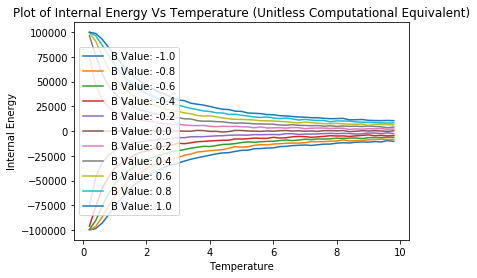

<Figure size 432x288 with 0 Axes>

In [0]:
"""
First gets each of the magnetic field levels and their related internal energies.
Next, we plot the graph of Internal Energies Vs Temperature for Each B.
"""
B_URes = zip(Bs, UofBofT)
index = 0
for mag, res in B_URes:
  plt.plot(Ts, res, label = "B Value: {}".format(mag))
  index += 1
plt.legend()
plt.title("Plot of Internal Energy Vs Temperature (Unitless Computational Equivalent)")
plt.xlabel("Temperature")
plt.ylabel("Internal Energy")
plt.figure()

#### As we can see from our graph, there is a clear trend between the internal energies of any given magnetic field value and increasing temperature - namely, no matter if the internal energy was positive or negative, increasing temperature causes an exponential decay down to zero. This makes sense, as increasing temperature should increasingly scramble the number of up spins and down spins until they're about even as temperature goes up, demagnetizing it and so reducing the internal energy of its then ordered state.

## Note the following from before:

A lot of quantum mechanical work shows that in a magnetic field $B$, the energy of these outermost electrons is
$$\epsilon_m=\mu_BmB,$$
where $\mu_B=e\hbar/2m_e=9.2741\cdot 10^{-24}$ Am$^2$ is the Bohr magneton, $m=\{-1,+1\}$ is the projection of the spin (corresponding to the states $\{\downarrow,\uparrow\}$, and $B$ is the magnetic field strength. So the two possible energies are $\epsilon_{\pm 1}=\pm\mu_BB$. If $B>0$ (i.e. oriented 'up') then the $\downarrow$ spin has a lower energy than the $\uparrow$; the situation is reversed when $B<0$ (oriented 'down'). 

#### Note that negative internal energies means that it's aligned with the magnetic field. If they're aligned, it means they're in a low equilibria and will tend to stay there, whilst if they're anti-aligned, it means that they can move to reach equilibria, meaning that it has a positive internal energy as it can rotate. Nevertheless, I kept the negative B values on the graph to illustrate the symmetry between positive and negative B values.

#### Notice the internal energy level level it starts at appears to start at plus or minus 10000 and then decrease more or less rapidly as a function of temperature. At plus 10k, all of the spins are aligned downwards, at minus 10k, all aligned upwards. This too is to be expected, as the math has tanh of B/T, and if we have a larger B, all that really changes is that the temperature has to be larger to bring that fraction down to the same value as if B was smaller.

####  Similarly, as the math is tanh of B/T, as T goes to 0, tanh becomes roughly the sign function of B from above:

## Again from before:

At low temperature $T\ll|\varepsilon|/k_B$, then 
$$\tanh(\varepsilon/k_BT)\to \tanh\left[\mbox{sgn}(\varepsilon)\infty\right]\sim \mbox{sgn}(\varepsilon).$$
Then $n_1-n_2\to \mbox{sgn}(\varepsilon)N$. If $\varepsilon>0$, then $n_1-n_2\sim N$, which means that $n_1\sim N$ and $n_2\sim 0$: all of the spins are $\downarrow$ and the system is completely magnetized. This means that at low temperature, if $\epsilon>0$ (which corresponds to $B>0$, i.e. the magnetic field pointing up), all the spins will have the tendency to point down. This is consistent with energy considerations (the energy for $\downarrow$ is lower than that for $\uparrow$ when $B>0$). We have $p_1\sim 1$ and $p_2\sim 0$, which means that the total entropy will be 
$$S\to -Nk_B\left[1\ln(1)+0\ln(0)\right]=-Nk_B\ln(1)=0;$$
note that while $\ln(0)$ is undefined, in the limit where the argument approaches zero, the log will diverge more slowly than the prefactor reaches zero (linearly). Thus the entropy at zero temperature is zero. Alternatively, because the state is so simple (all the spins are pointing in the same direction), we only need one bit to describe the system! On the other hand, if $\varepsilon<0$ ($B<0$ or magnetic field pointing down), then $n_1-n_2\sim -N$, which means that $n_1\sim 0$ and $n_2\sim N$: all of the spins are $\uparrow$, and the system is again completely magnetized but in the opposite direction.

#### So if tanh becomes the sign function, then our probabilities become (1/2) (1 + sign(B)) and (1/2) (1-sign(B)), which is either 100% probability or 0 probability for each depending on the sign, hence why we see that ALL of the spins are aligned and the initial value is about plus or minus 10k as 10k is our initial number of particles. That is, at T = 0, the probability that these spins are aligned in a given direction reaches 100%, hence why we have magnetization or internal energy at 10000.

### In the limit as temperature goes to infinity, the magnetization should drop to zero, based off this graph. Again, this makes sense as temperature scrambles the spins, resulting in more misaligning spins, resulting in a lack of magnetization, resulting in no internal energy from the orderedness of its internal state.



<Figure size 432x288 with 0 Axes>

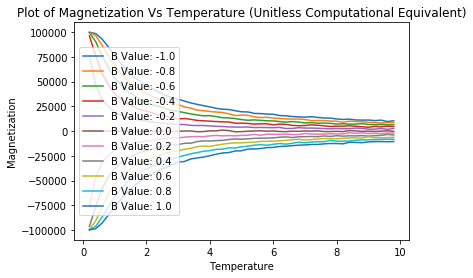

<Figure size 432x288 with 0 Axes>

In [0]:
"""
First gets each of the magnetic field levels and their related magnetizations.
Next, we plot the graph of Magnetization vs Temperature for each B
"""
B_MRes = zip(Bs, MofBofT)
index = 0
for mag, res in B_MRes:
  plt.plot(Ts, res, label = "B Value: {}".format(mag))
  index += 1
plt.legend()
plt.title("Plot of Magnetization Vs Temperature (Unitless Computational Equivalent)")
plt.xlabel("Temperature")
plt.ylabel("Magnetization")
plt.figure()

#### Here we see the same story as above. As temperature increases, the magnetization decreases. But note that compared to the internal energy graph, this graph is flipped vertically - the top line here corrisponds to the bottom line before, and so on. Again, it makes sense, as the more temperature rises, the more the electrons are able to randomly spin every which way, resulting in a more even spread of up and down spins, resulting in much lower magnetization. 


#### Notice the magnetization level it starts at appears to start at plus or minus 10000 and then decrease more or less rapidly as a function of temperature. At plus 10k, all of the spins are aligned downwards, at minus 10k, all aligned upwards. This too is to be expected, as the math has tanh of B/T, and if we have a larger B, all that really changes is that the temperature has to be larger to bring that fraction down to the same value as if B was smaller. Similarly, due to tanh becoming roughly the sign function (as noted above), all the spins will be aligned with a given direction with probability 100%, hence this result. As in, the justification is the exact same as before.

### In the limit as temperature goes to infinity, the magnetization should drop to zero, based off this graph. It makes sense for the same reason as before.

<Figure size 432x288 with 0 Axes>

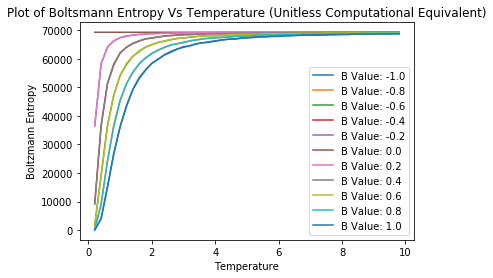

<Figure size 432x288 with 0 Axes>

In [0]:
"""
First gets each of the magnetic field levels and their related internal energies.
Next, we plot the graph of Internal Energies Vs Temperature for Each B.
"""
B_SRes = zip(Bs, SofBofT)
index = 0
for mag, res in B_SRes:
  plt.plot(Ts, res, label = "B Value: {}".format(mag))
  index += 1
plt.legend()
plt.title("Plot of Boltsmann Entropy Vs Temperature (Unitless Computational Equivalent)")
plt.xlabel("Temperature")
plt.ylabel("Boltzmann Entropy")
plt.figure()

#### Here we can see that as temperature increases, entropy rapidly increases to a maximumm, in a way resembling a logarithmic graph. This again makes sense, as increasing heat allows the electrons to dislodge themselves and randomly spin every which way without being realigned by the external magnetic field. However, note that this isn't actually a logarithmic graph - the entropy apprars to rise to an extremely definitive flat-line maximum value as temperature rises to a maximum. This makes sense - systems can only be rearrnged so many ways, so each system has a maximum entropy. But what value does it rise to?

## Note the following from before:

Let's consider the high and low-temperature limits of this expression. At high temperature $T\gg |\varepsilon|/k_B$, then $\tanh(\varepsilon/k_BT)\to \tanh(0)\sim 0$; then $n_1-n_2\to 0$ or $n_1\to n_2$. In this limit, the number of $\uparrow$ and $\downarrow$ spins is equal, which means that on average there is no magnetization. As the probabilities for both states are equal, $p_1=n_1/N=n_2/N=p_2=1/2$, the Boltzmann entropy is 
$$S\to -Nk_B\left[\frac{1}{2}\ln\left(\frac{1}{2}\right)+\frac{1}{2}\ln\left(\frac{1}{2}\right)\right]
=Nk_B\ln(2)=k_B\ln\left(2^N\right).$$
As Boltzmann entropy is defined as $S=k_B\ln(\Omega)$, where $\Omega$ is the macrostate occupation, this is equivalent to stating that $\Omega=2^N$, i.e. the two outcomes (heads / tails, up / down) for each particle. This high-temperature limit gives the highest entropy, because entropy is maximized when the probabilities are all equal. So high temperature $=$ maximum 
entropy, which connects these two important quantities conceptually.

#### We are utilizing unitless values. What this means is that our entropy captues all of the values except the $k_B$ constant of the S equation there. What this means is that as our temperature approaches infinity, the likelihood of either spin becomes 1/2, giving us the equation derrived above, and so our entropy should approach $ln(2^N)$, which is equivalent to $N*ln(2)$. What is $ln(2)$? It comes out to about 0.69 or so, nearly 0.7. What is our N? It is the number of particles, and in the above we have specified our N to be about 100000. Thus, the result for our ultimate maximum entropy we expect based off the stuff from before is about 69 000. From the graph above, that is indeed about where we converge to, confirming that our methodology is correct.

### Finally, notice that as temperature goes to 0, the entropy appears to go to zero. This makes sense, as when temperature is zero, all the spins are aligned, so there is no 'randomness' which needs to be described by the Shannon Boltzman entropy. Furthermore, it makes sense with the third law of thermodynamics as formulated by Newst, as when temperature is 0, entropy goes to zero as stated in the law.


**Problem (30 points):** Now turn the problem around. Assume now that $N$ and $\tilde{B}>0$ are fixed (so that $\mu_BB$ is simply an energy scale). Now slowly change the value of $p_1$ in the range $0<p_1<1$. Calculate the (dimensionless) Shannon form of the Boltzmann entropy
$$\tilde{S}=-N\left[p_1\ln(p_1)+p_2\ln(p_2)\right]$$
and the (dimensionless) total energy $\tilde{U}=n_2-n_1$. Now calculate the (inverse dimensionless) temperature by numerically evaluating the derivative 
$$\frac{1}{\tilde{T}}=\frac{d\tilde{S}}{d\tilde{U}}.$$
You can compute this derivative numerically by evaluating the finite difference
$$\frac{1}{\tilde{T}}\approx \frac{\tilde{S}(p_1+\Delta p_1)-\tilde{S}(p_1)}{\tilde{U}(p_1+\Delta p_1)-\tilde{U}(p_1)}.$$
As long as $\Delta p_1\ll 1$ then this should give a good approximation to the derivative. The advantage of this approach is that you don't need to perform any analytical calculations at all. Again, obtain (and plot) the total energy, the magnetization, and the entropy as a function of $\tilde{T}$ at this fixed $\tilde{B}>0$. Are the results the same as found above?

### Me: SO! Vary pi, randomly sample pi, calculate derrivative.

Hi 481ers -

I have a tiny clarification of Q (2) on the current Assignment (#6). It says to calculate the entropy by using the p_1 that you are varying. This is less than ideal (read: wrong) in that the expression is theoretical rather than numerical; rather, you should obtain a sample of n_1 and n_2 and then use the regular expression for S that involves n_1/N and n_2/N. The theoretical and numerical values for S should be very close to one another for large samples, but they aren't identical.

CU

David

In [0]:
#Q2

"""
Gets the theoretical shannon-boltzmann entropy given N number of particles and probabilities.
Not supposed to be used according to Prof. Feder.
"""
def getShanEnt(N, p1):
  return (-N)*((p1)*(np.log((p1)))+(1-p1)*(np.log((1-p1))))

"""
Calculates unitless Boltzmann Entropy given ups and downs. Same as before.
"""
def getNumEnt(ups, downs):
  total = ups + downs
  return (-total)*((ups/total)*(np.log((ups/total)))+(downs/total)*(np.log((downs/total))))

"""
Given the probabilities and number of particles, returns the number of up and down spin particles.
"""
def manySpins(p1, N):
  res = [0,0]
  for i in range(N):
    randRes = rand.random()
    if randRes < p1:
      res[0] += 1
    else:
      res[1] += 1
  return res

"""
Calculates unitless internal energy given ups and downs.
"""
def getInternalE(ups, downs):
  return ups - downs

"""
Calculates unitless magnetic moment given downs and ups.
"""
def getM(ups, downs):
  return downs - ups

"""
This function calculates the derrivative via approximation between points.
"""
def approxDerriv(Xs, Ys):
  derriv = []
  index = 1
  while index < len(Xs):
    derriv.append((Ys[index] - Ys[(index-1)])/(Xs[index] - Xs[(index-1)]))
    index += 1
  return derriv
  
"""
The following functions aren't needed for now.
"""
def srtFst(aList):
  if (aList == []): return []
  lst = aList
  fstEntry = lst.pop()
  return srtFst([x for x in lst if x[0] < fstEntry[0]]) + [fstEntry] + srtFst([x for x in lst if x[0] >= fstEntry[0]])

def unzip(lst):
  x = []
  y = []
  for entry in lst:
    x.append(entry[0])
    y.append(entry[1])
  return x, y

def myZip(Xs, Ys):
  length = min(len(Xs), len(Ys))
  zipped = []
  for i in range(length):
    zipped.append((Xs[i], Ys[i]))
  return zipped

In [0]:
#Sanity check
approxDerriv([1,2,3],[2,4,8])

[2.0, 4.0]

### Again, I have attained the entropy, internal energy and temperature given our randomized spins for reach given probability P, and plotted it as a function of our derrivative-calculated temperature T. Is the result similar to the results in the last question? Let's check.

[        nan  0.47868135  0.5465344   0.60015136  0.65240604  0.69669559
  0.74424666  0.79818699  0.84429947  0.88173208  0.92835759  0.98262811
  1.03035874  1.0775806   1.12933362  1.18024214  1.23055112  1.29391667
  1.36062244  1.41657503  1.47354518  1.53475177  1.60678279  1.70068214
  1.79275789  1.86761752  1.96059628  2.08253309  2.19148743  2.28597913
  2.39702217  2.53478418  2.7162642   2.91425194  3.11094178  3.36135524
  3.62914659  3.98511919  4.33107493  4.65569708  5.14352421  5.81969915
  6.63911842  7.71560888  9.21260116 11.12167839 13.75913962 18.53063933
 27.42988574 64.54782983]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in log
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in double_scalars
  


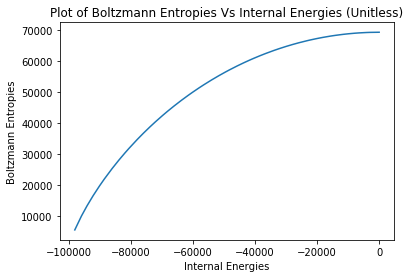

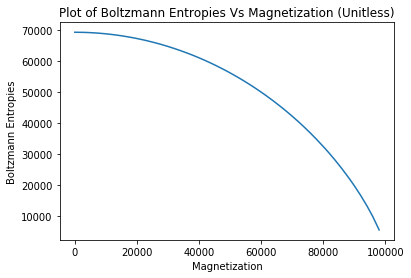

<Figure size 432x288 with 0 Axes>

In [0]:
"""
So my problem was that at N = 1000 or below, it didn't really capture a smooth curve. Once I jacked it up to 10k or 100k, I got nice graphs.
"""

N = 100000
probs = [x/100 for x in range(51)]

"""
The following isn't needed anymore since we don't want to compute theroetical probabilities. We want experimental.
See Prof. Feder's Email for more details. 

shanEnts = []
for p in probs:
  shanEnts.append(getShanEnt(N, p))
"""

"""
Get the results of many spins for each probability in N
"""
reses = []
for p in probs:
  res = manySpins(p, N)
  reses.append(res)

"""
Calculate results we want for each of the many spins calculated above.
Calculated values are internal energy, magnetization, and Boltzmann entropy
"""
intEs = []
Ms = []
nEnts = []
for res in reses:
  nEnts.append(getNumEnt(res[0], res[1]))
  intEs.append(getInternalE(res[0], res[1]))
  Ms.append(getM(res[0], res[1]))
  
"""
Reorganizing shanEnts and intEs by intE order.
This didn't help, why? WHY?
Ah, it was the theoretical experimental mixup problem.
"""
"""
intShans = myZip(intEs[1:], shanEnts[1:])
intShans = srtFst(intShans)
intEs, shanEnts = unzip(intShans)
print(intEs)
print(shanEnts)
"""

#Not needed, just plotted this for fun.
plt.plot(intEs, nEnts)
plt.title("Plot of Boltzmann Entropies Vs Internal Energies (Unitless)")
plt.xlabel("Internal Energies")
plt.ylabel("Boltzmann Entropies")
plt.figure()

plt.plot(Ms[0:], nEnts)
plt.title("Plot of Boltzmann Entropies Vs Magnetization (Unitless)")
plt.xlabel("Magnetization")
plt.ylabel("Boltzmann Entropies")
plt.figure()

"""
Needed: Temperature. Here the derrivative is calculated.
"""
OverTs = approxDerriv(intEs, nEnts)
OverTs = np.array(OverTs)
Ts = 1/OverTs
print(Ts)


#### The above plots are not strictly necessary, but they serve as a sanity check. Plotting boltzmann entropies against internal eneries or magnetization, I can confirm that I have a smooth, sensible graph, confirming that the data is reasonable.

In [0]:
"""
Debugging why I was getting really strange entropies vs temperatures. That turned out to be due to use of theoretical rather than experimental data.
"""
print(nEnts)

print(intEs)

#OH! The problem is that it doubles back at some points! So... zip them and sort them, I think. I don't want it getting negative because the x values double back; only if the y values do.

[nan, 5646.054294756867, 9904.926934049401, 13702.896139001134, 16892.809620536882, 19966.197742340795, 22883.448163846628, 25590.930867516905, 28249.035156204096, 30373.926532355337, 32655.262490345747, 34490.243196972224, 36752.22944920511, 38670.97415623031, 40684.69042110519, 42621.422717441936, 44023.32471341926, 45373.914438476124, 47017.8238284153, 48955.52053393058, 50135.74801157057, 51555.54239736742, 52785.55735600061, 53760.348784266884, 55316.87403875015, 56243.399812651616, 57619.209962123416, 58317.925408616145, 59130.2435777199, 60351.5941522827, 60920.30063982178, 61772.561827138416, 62631.79791684589, 63561.39319003978, 64128.720799495786, 64825.381091449344, 65253.28044137321, 65781.23194618821, 66483.23176282101, 66858.22935723487, 67415.03339777836, 67692.03611161644, 68079.36968290879, 68393.05734896251, 68558.32574617806, 68816.28651066047, 68996.61669775065, 69143.50782385458, 69220.42359411436, 69298.87521932527]
[-100000, -97980, -95948, -93868, -91938, -89922

<Figure size 432x288 with 0 Axes>

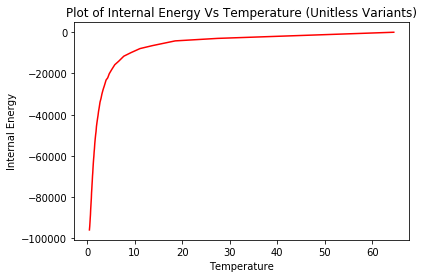

<Figure size 432x288 with 0 Axes>

In [0]:
"""
Needed plots
"""

#Internal energy of the unknown
plt.plot(Ts[0:], intEs[1:], "r-")
plt.title("Plot of Internal Energy Vs Temperature (Unitless Variants)")
plt.xlabel("Temperature")
plt.ylabel("Internal Energy")
plt.figure()


#### Now for the real deal. This is a plot of internal energies versus temperature. This is exactly like one of the attained lines from the internal energies graph above, with the negative internal energy strongly hinting our magnetization is aligned with the external field, which based off the magnetization graph should be a positive B. Unlike above, we only managed to attain a curve which trends to zero as temperature rises for just one possible magnetization; furthermore, the step size each time is exactly the same when it comes to probability. This gives it a noticibly different shape than the much smoother curves from the attained lines from the internal energies in question 1, which is a bit sharper, since previously, probabilities varied as a constant divided by a denominator increasing in size constantly, which does not produce a constant change in probability, unlike here where by sampliing fiat, the probability varies by the same increment every time, allowing it to converge on 0 much more quickly than in question 1. The direction of the trend is similar, and the shape similar, but the subtle specifics are different. 

#### Whilst I had to cut off the first entry due to the fact that temperature was calculated as the difference, and so the line cannot extend back to 0 temperature, notice that as temperature goes to 0, the internal energy goes to -100000 which is exactly -N. This is again consistent with the probability of tanh at T = 0 going as the sign function, where here our B is negative and so we're getting all down-spins and so we're getting negative internal energies.

<Figure size 432x288 with 0 Axes>

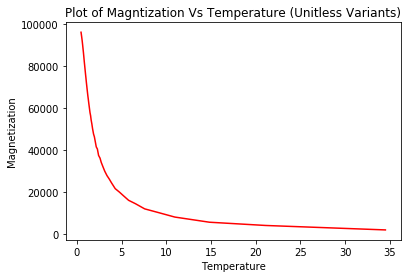

<Figure size 432x288 with 0 Axes>

In [0]:

#Magnetization of the unknown
plt.plot(Ts[0:], Ms[1:], "r-")
plt.title("Plot of Magntization Vs Temperature (Unitless Variants)")
plt.xlabel("Temperature")
plt.ylabel("Magnetization")
plt.figure()


#### It's similar for the magnetization. We can see that the magnetization starts extremely high, meaning that most of the spins are aligned as down spins, and then decrease rapidly as temperature rises. The down-spin alignment again hints that our simulated B is a negatively orientated external magnetic field. 

#### Furthermore, note the starting point of 100k. Again, this is due to the sign function stuff above - or rather, it confirms the sign function stuff from above, as we're getting the same result of 100% probability of a certain spin at temperature = 0.

#### This makes sense as when temperature rises, spins can reorient themselves due to the kinetic jostling of temperature, allowing them to misalign which cancels out the alignment that caused the magnetization in the first place. Similarly, due to how our probability varies by a set increment instead of an ever decreasing increment like in Q1, this graph converges on a magnetization of 0 much more quickly. The direction of the trend is similar, and the shape similar, but the subtle specifics are different.

Text(0, 0.5, 'Boltzmann Entropies')

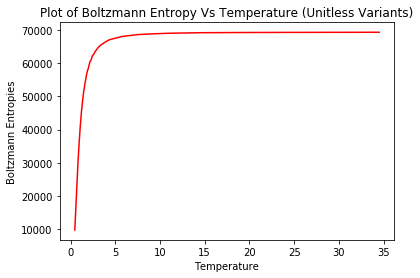

In [0]:
#Shannon Entropy of the unknown
plt.plot(Ts[0:], nEnts[1:], "r-")
plt.title("Plot of Boltzmann Entropy Vs Temperature (Unitless Variants)")
plt.xlabel("Temperature")
plt.ylabel("Boltzmann Entropies")


#### Finally, we have the same story with the Boltzmann Entropy. Again, it trends similarly to question 1, converging on a set maximum number, which given that we have 100000 particles, and that our unitless entropy is Nlog(2), where log(2) is 0.69 or so, so it should be converging on about 69000, which is exactly where it converges. Again, because our probabilities are increasing at a set interval, it converges to that number much, much faster than would otherwise be natural by varying the denominator in question 1, hence the slightly sharper shape and flatlining at the top.

#### Also once again notice that as temperature drops to 0, the curve appears to go to 0. This again follows the third law of thermodynamics and confirms our model is likely correct.

### Overall, the results of Q1 and Q2 are relatively similar, with Q1 capturing how it varies by heat and many different Bs, and only asymptotically going to 0 or 69000 for internal energy and magnetization or boltzmann entropy, respectively, whilst Q2 captures the behavior of one unknown B (or a strongly varying B, it's not obvious) with set probability increments which mean that rather than asymptotically reaching 0 or 69000, it hits it in a set amount of time as probability deterministically becomes evenly balanced rather than taking forever to do so as a result of an ever escalating denominator.